## Install yfinance

In [1]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [2]:
import yfinance as yf

## Download the data

In [3]:
# Weekly BTC data for the past year
btc_weekly = yf.download("BTC-USD", 
                          start="2023-12-09", 
                          end="2024-12-09", 
                          interval="1wk")

[*********************100%***********************]  1 of 1 completed


In [4]:
btc_weekly.head()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
Date,,,,,,
2023-12-04,43779.699219,43779.699219,44361.257812,43593.285156,44180.019531,30368691589
2023-12-11,41364.664062,41364.664062,43808.375000,40234.578125,43792.019531,168493481950
2023-12-18,43016.117188,43016.117188,44367.957031,40530.257812,41348.203125,152084171491
2023-12-25,42265.187500,42265.187500,43804.781250,41424.062500,43010.574219,157807126208
2024-01-01,43943.097656,43943.097656,45899.707031,40813.535156,42280.234375,202311773985


In [5]:
# Daily BTC data for the past year
btc_daily = yf.download("BTC-USD", 
                         start="2023-12-09", 
                         end="2024-12-09", 
                         interval="1d")

[*********************100%***********************]  1 of 1 completed


In [6]:
btc_daily.head()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
Date,,,,,,
2023-12-09,43725.984375,43725.984375,44361.257812,43627.597656,44180.019531,17368210171
2023-12-10,43779.699219,43779.699219,44034.625000,43593.285156,43728.382812,13000481418
2023-12-11,41243.832031,41243.832031,43808.375000,40234.578125,43792.019531,40632672038
2023-12-12,41450.222656,41450.222656,42048.304688,40667.562500,41238.734375,24779520132
2023-12-13,42890.742188,42890.742188,43429.781250,40676.867188,41468.464844,26797884674


In [7]:
# Minute-by-minute BTC data for a single day
btc_minute = yf.download("BTC-USD", 
                          start="2024-12-09", 
                          end="2024-12-10",  # End date is exclusive, so set it to the next day
                          interval="1m")

[*********************100%***********************]  1 of 1 completed


In [8]:
btc_minute.head()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
Datetime,,,,,,
2024-12-09 00:00:00+00:00,101212.476562,101212.476562,101212.476562,101212.476562,101212.476562,0
2024-12-09 00:01:00+00:00,101222.703125,101222.703125,101222.703125,101222.703125,101222.703125,0
2024-12-09 00:02:00+00:00,101089.031250,101089.031250,101089.031250,101089.031250,101089.031250,94830592
2024-12-09 00:03:00+00:00,101045.281250,101045.281250,101045.281250,101045.281250,101045.281250,18284544
2024-12-09 00:04:00+00:00,100978.000000,100978.000000,100978.000000,100978.000000,100978.000000,13172736


## Log-return and Volatility

In [9]:
import numpy as np

# Assuming 'btc_daily' is a DataFrame with a 'Close' column
btc_daily['log_return'] = np.log(btc_daily['Close'] / btc_daily['Close'].shift(1))

In [10]:
btc_daily['log_return'].head()

Date
2023-12-09         NaN
2023-12-10    0.001228
2023-12-11   -0.059669
2023-12-12    0.004992
2023-12-13    0.034163
Name: log_return, dtype: float64

In [11]:
btc_daily.head()

Price,Adj Close,Close,High,Low,Open,Volume,log_return
Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD,
Date,,,,,,,
2023-12-09,43725.984375,43725.984375,44361.257812,43627.597656,44180.019531,17368210171,NaN
2023-12-10,43779.699219,43779.699219,44034.625000,43593.285156,43728.382812,13000481418,0.001228
2023-12-11,41243.832031,41243.832031,43808.375000,40234.578125,43792.019531,40632672038,-0.059669
2023-12-12,41450.222656,41450.222656,42048.304688,40667.562500,41238.734375,24779520132,0.004992
2023-12-13,42890.742188,42890.742188,43429.781250,40676.867188,41468.464844,26797884674,0.034163


In [12]:
daily_vol = btc_daily['log_return'].std()
annual_vol = daily_vol * np.sqrt(365)  # Annualizing the volatility
print("Estimated annualized volatility:", annual_vol)

Estimated annualized volatility: 0.5285406671846464


## Download two co-integrated Cryptoasset

In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

def get_continuous_data(ticker, start, end, interval="1m"):
    # Download the data for the given ticker and time range
    df = yf.download(ticker, start=start, end=end, interval=interval)

    # Check if we got any data
    if df.empty:
        print(f"No data returned for {ticker}. Please choose a different date range.")
        return df

    # Check if the time series has any missing minutes
    time_diff = df.index.to_series().diff()
    missing_periods = (time_diff > pd.Timedelta("1min")).sum()
    print(f"{ticker} - Number of missing periods:", missing_periods)

    # Create a full one-day minute frequency index
    # Use '1T' to represent 1-minute frequency
    full_range = pd.date_range(start=start, end=end, freq="1T", tz=df.index.tz)
    
    # Reindex the DataFrame to the full range and forward fill missing values
    df_full = df.reindex(full_range, method="ffill")
    return df_full

# Prompt the user to input two crypto tickers (e.g., "BTC-USD", "ETH-USD")
ticker1 = input("Please enter the first crypto ticker (e.g., BTC-USD): ")
ticker2 = input("Please enter the second crypto ticker (e.g., ETH-USD): ")

# Use a realistic past date range where data actually exists
start_date = "2024-12-09"
end_date = "2024-12-10"

# Get continuous minute-by-minute data for both tickers
df1 = get_continuous_data(ticker1, start_date, end_date)
df2 = get_continuous_data(ticker2, start_date, end_date)

# Remove the first row of both dataframes
df1 = df1.iloc[1:]
df2 = df2.iloc[1:]

# Check if both dataframes are not empty
if df1.empty or df2.empty:
    print("One or both dataframes are empty. Please try different tickers or date range.")
else:
    # Calculate the initial prices and normalize
    initial_price_1 = df1['Close'].iloc[0]
    initial_price_2 = df2['Close'].iloc[0]

    df1_normalized = df1['Close'] / initial_price_1
    df2_normalized = df2['Close'] / initial_price_2

    # Plot the normalized time series
    plt.figure(figsize=(12,6))
    plt.plot(df1_normalized.index, df1_normalized, label=f'{ticker1} (Normalized)', color='orange')
    plt.plot(df2_normalized.index, df2_normalized, label=f'{ticker2} (Normalized)', color='blue')

    plt.title(f'Normalized Price Comparison: {ticker1} vs. {ticker2}')
    plt.xlabel('Time')
    plt.ylabel('Normalized Value (Starting at 1)')
    plt.legend()
    plt.grid(True)
    plt.show()


In [ ]:
# Calculate the log returns for the first asset (df1)
lr1 = np.log(df1['Close'].squeeze() / df1['Close'].squeeze().shift(1))

# Calculate the log returns for the second asset (df2)
lr2 = np.log(df2['Close'].squeeze() / df2['Close'].squeeze().shift(1))

# Calculate the mean of log returns for the first asset, annualized for 1440 minutes (1 day)
mu_1 = lr1.mean() * 1440

# Calculate the mean of log returns for the second asset, annualized for 1440 minutes (1 day)
mu_2 = lr2.mean() * 1440

# Calculate the standard deviation of log returns for the first asset, scaled to annualized volatility
sigma_1 = lr1.std() * np.sqrt(1440)

# Calculate the standard deviation of log returns for the second asset, scaled to annualized volatility
sigma_2 = lr2.std() * np.sqrt(1440)

# Calculate the correlation coefficient between the two assets' log returns
rho = lr1.corr(lr2)

# Initialize the starting value for the process
z_0 = 0.00

# Define the risk aversion parameter (gamma) and mean reversion strength (delta)
gamma = 0.5
delta = 0.8

# Define the time horizon (T) and the number of time steps (M)
T = 1
M = len(df1)

In [ ]:
from scipy.stats import linregress

# Perform a linear regression on the log-transformed 'Close' prices of the two assets.
# The independent variable is the log of df1['Close'] (skipping the first row).
# The dependent variable is the log of df2['Close'] (skipping the first row).
result = linregress(np.log(df1['Close'].iloc[1:].squeeze()), np.log(df2['Close'].iloc[1:].squeeze()))

# Extract the slope of the regression line, representing the beta coefficient.
beta = result.slope

# Display the calculated beta value
beta

In [74]:
# Set the initial price for the first asset (S1) to its normalized starting price
S1_0 = initial_price_1

# Set the initial price for the second asset (S2) to its normalized starting price
S2_0 = initial_price_2

# Print the initial prices to verify the values
print(f"Initial price of the first cyrpto (S1_0): {S1_0}")
print(f"Initial price of the second cyrpto (S2_0): {S2_0}")

Initial price of the first cyrpto (S1_0): Ticker
TRX-USD    0.318584
Name: 2024-12-09 00:01:00+00:00, dtype: float64
Initial price of the second cyrpto (S2_0): Ticker
HTX-USD    0.000003
Name: 2024-12-09 00:01:00+00:00, dtype: float64


In [75]:
# Define the time step based on the total time horizon (T) and the number of steps (M)
dt = T / M

# Initialize arrays to store simulation values for both assets and other variables
S1 = np.zeros((M + 1, 1))  # Price trajectory for the first asset
S2 = np.zeros((M + 1, 1))  # Price trajectory for the second asset
z = np.zeros((M + 1, 1))   # Process variable (e.g., mean-reverting factor)
a = np.zeros((M + 1, 1))   # Placeholder array for auxiliary calculations
b = np.zeros((M + 1, 1))   # Placeholder array for auxiliary calculations
c = np.zeros((M + 1, 1))   # Placeholder array for auxiliary calculations
Pi_1 = np.zeros((M + 1, 1))  # Weight or portfolio allocation for the first asset
Pi_2 = np.zeros((M + 1, 1))  # Weight or portfolio allocation for the second asset

In [76]:
# Create a time grid from 0 to 1 with M+1 evenly spaced points
tt = np.linspace(0, 1, M + 1)

# Set initial values for the process variables and asset prices
z[0] = z_0  # Initial value for the process variable z
S1[0] = S1_0  # Initial price of the first asset
S2[0] = S2_0  # Initial price of the second asset

# Calculate the combined volatility (sigma_beta) of the portfolio
sigma_beta = np.sqrt(sigma_1 ** 2 + beta ** 2 * sigma_2 ** 2 + 2 * beta * sigma_1 * sigma_2 * rho)

# Calculate the mean-reversion target (eta) based on model parameters
eta = (-1 / delta) * (mu_1 - sigma_1 ** 2 / 2 + beta * (mu_2 - sigma_2 ** 2 / 2))

# Generate random numbers for the stochastic process
rn = np.random.standard_normal(z.shape)

# Simulate the process and update prices for each time step
for t in range(1, M + 1):
    # Update the process variable z using a mean-reverting model with randomness
    z[t] = z[t-1] * (1 - delta * (eta - z[t-1])) * dt + sigma_beta * np.sqrt(dt) * (
        (sigma_1 + beta * sigma_2 * rho) / sigma_beta * rn[t] + 
        beta * (sigma_2 * np.sqrt(1 - rho ** 2) / sigma_beta) * rn[t]
    )
    
    # Update the prices for the assets based on the data
    S1[t] = df1['Close'].iloc[t-1]  # Price of the first asset at time t
    S2[t] = df2['Close'].iloc[t-1]  # Price of the second asset at time t

Text(0.5, 1.0, 'z')

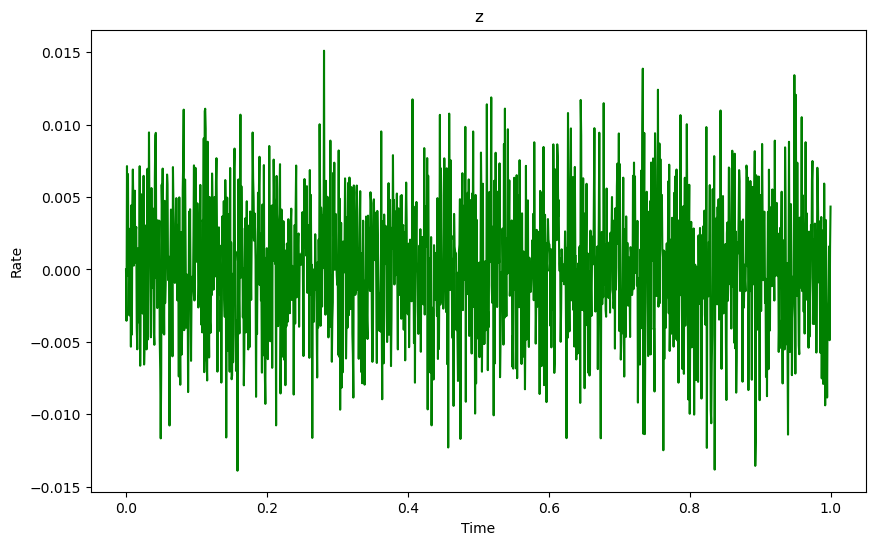

In [77]:
# Create a new figure with specified dimensions
plt.figure(figsize=(10, 6))

# Plot the process variable z over time
plt.plot(tt, z, 'g', lw=1.5)  # Green line with a line width of 1.5

# Label the x-axis and y-axis
plt.xlabel('Time')  # X-axis represents time
plt.ylabel('Rate')  # Y-axis represents the rate (z)

# Add a title to the plot
plt.title('z')  # Title represents the process variable being plotted

In [78]:
for t in range(1, M + 1):
    # Calculate the coefficient a[t], related to the risk-aversion and variance
    a[t] = 0.5 * (T - t * dt) / ((1 - rho ** 2) * sigma_1 ** 2)
    
    # Calculate the coefficient b[t], involving the interaction of the asset variances and correlation
    b[t] = -0.25 * (T - t * dt) ** 2 * (sigma_1 ** 2 + beta * sigma_2 ** 2) / ((1 - rho ** 2) * sigma_1 ** 2) \
           - rho * mu_2 * (T - t * dt) / ((1 - rho ** 2) * sigma_1 * sigma_2)
    
    # Calculate the coefficient c[t], combining multiple terms of mean, variance, and correlation
    c[t] = 0.5 * mu_2 ** 2 * (T - t * dt) / ((1 - rho ** 2) * sigma_2 ** 2) \
           + 0.25 * (T - t * dt) ** 2 * (sigma_1 ** 2 + beta * sigma_2 ** 2 + 2 * sigma_1 * sigma_2 * beta * rho) * delta ** 2 / ((1 - rho ** 2) * sigma_1 ** 2) \
           + 0.25 * (T - t * dt) ** 2 * mu_2 * delta * rho * (sigma_1 ** 2 + beta * sigma_2 ** 2) \
           + 1 / 24 * (T - t * dt) ** 3 * (sigma_1 ** 2 + beta * sigma_2 ** 2) ** 2 * delta ** 2 / ((1 - rho ** 2) * sigma_1 ** 2)
    
    # Compute the portfolio weight for the first asset (Pi_1) considering risk-aversion and dynamics
    Pi_1[t] = (1 / S1[t-1]) * (
        (mu_1 + delta * z[t]) / (gamma * (1 - rho ** 2) * sigma_1 ** 2) \
        + delta / gamma * (-2 * a[t] * (mu_1 + delta * z[t]) - b[t]) \
        - rho * mu_2 / (gamma * (1 - rho ** 2) * sigma_1 * sigma_2)
    )
    
    # Compute the portfolio weight for the second asset (Pi_2) with similar dynamics
    Pi_2[t] = (1 / S2[t-1]) * (
        mu_2 / (gamma * (1 - rho ** 2) * sigma_2 ** 2) \
        + delta * beta / gamma * (-2 * a[t] * (mu_1 + delta * z[t]) - b[t]) \
        - rho * (mu_1 + delta * z[t]) / (gamma * (1 - rho ** 2) * sigma_1 * sigma_2)
    )

## Weight process

Text(0.5, 1.0, 'Weights')

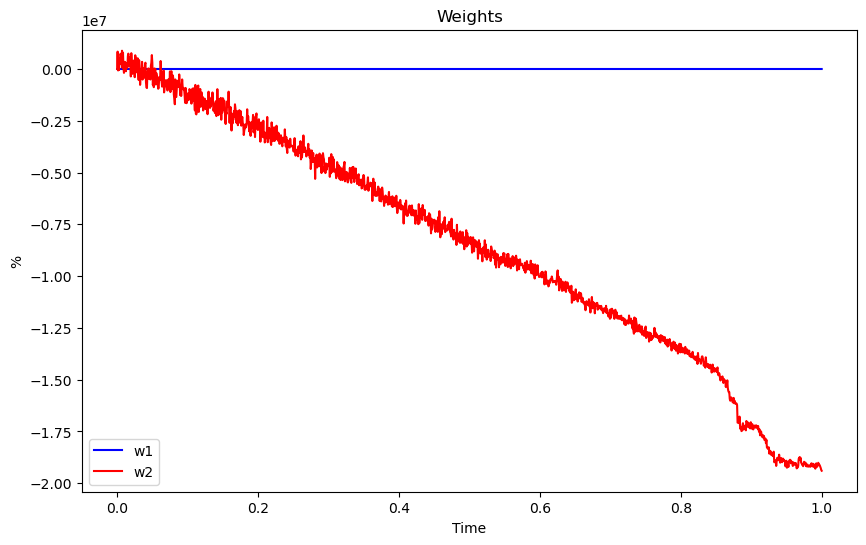

In [79]:
# Create a new figure with specified dimensions
plt.figure(figsize=(10, 6))

# Plot the portfolio weight for the first asset (Pi_1) over time
plt.plot(tt, Pi_1, 'b', lw=1.5, label='w1')  # Blue line representing the first asset weight

# Plot the portfolio weight for the second asset (Pi_2) over time
plt.plot(tt, Pi_2, 'r', lw=1.5, label='w2')  # Red line representing the second asset weight

# Add a legend to distinguish between the two weights
plt.legend(loc=0)  # Automatically selects the best location for the legend

# Label the x-axis as 'Time'
plt.xlabel('Time')

# Label the y-axis as '%' (weights as percentages)
plt.ylabel('%')

# Add a title to the plot to describe its content
plt.title('Weights')

## Wealth process

Text(0.5, 1.0, 'Weights')

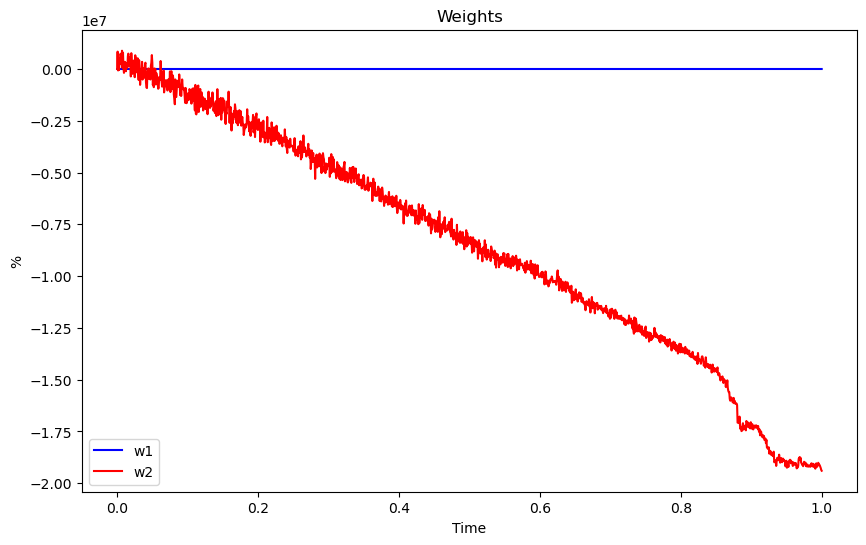

In [82]:
# Create a new figure with specified dimensions
plt.figure(figsize=(10, 6))

# Plot the portfolio weight for the first asset (Pi_1) over time
plt.plot(tt, Pi_1, 'b', lw=1.5, label='w1')  # Blue line representing the first asset weight

# Plot the portfolio weight for the second asset (Pi_2) over time
plt.plot(tt, Pi_2, 'r', lw=1.5, label='w2')  # Red line representing the second asset weight

# Add a legend to distinguish between the two weights
plt.legend(loc=0)  # Automatically selects the best location for the legend

# Label the x-axis as 'Time'
plt.xlabel('Time')

# Label the y-axis as '%' (weights as percentages)
plt.ylabel('%')

# Add a title to the plot to describe its content
plt.title('Weights')

Text(0.5, 1.0, 'Wealth')

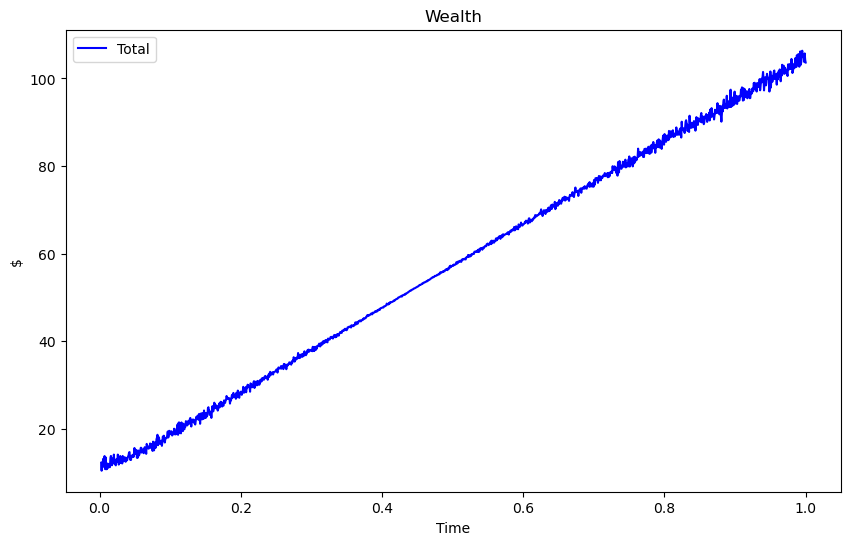

In [83]:
# Calculate the total wealth as the sum of the absolute contributions from both assets
Wealth = abs(Pi_1 * S1) + abs(Pi_2 * S2)

# Create a new figure with specified dimensions
plt.figure(figsize=(10, 6))

# Plot the total wealth over time, excluding the initial value at t=0
plt.plot(tt[1:], Wealth[1:], 'b', lw=1.5, label='Total')  # Blue line for total wealth

# Add a legend to label the total wealth line
plt.legend(loc=0)  # Automatically selects the best location for the legend

# Label the x-axis as 'Time'
plt.xlabel('Time')

# Label the y-axis as '$' to represent monetary value
plt.ylabel('$')

# Add a title to describe the content of the plot
plt.title('Wealth')

## Total return

In [54]:
Wealth[3]   # Inital Wealth

array([10.67945284])

In [55]:
Wealth[-1]  # Ending Wealth

array([103.29858548])

In [85]:
# Calculate the normal return as the percentage change in wealth from t=3 to the final time
Return = (Wealth[-1] - Wealth[3]) / Wealth[3]  # Normal Return

# Convert the return to a percentage and print it
print(f"Return: {Return.item() * 100:.2f}%")  # Print the return as a percentage with two decimal places

Return: 742.24%
